<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

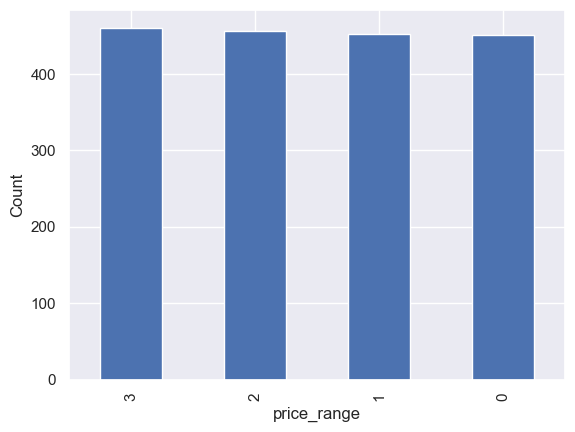

<class 'pandas.core.frame.DataFrame'>
Index: 1820 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1820 non-null   int64  
 1   blue           1820 non-null   int64  
 2   clock_speed    1820 non-null   float64
 3   dual_sim       1820 non-null   int64  
 4   fc             1820 non-null   int64  
 5   four_g         1820 non-null   int64  
 6   int_memory     1820 non-null   int64  
 7   m_dep          1820 non-null   float64
 8   mobile_wt      1820 non-null   int64  
 9   n_cores        1820 non-null   int64  
 10  pc             1820 non-null   int64  
 11  px_height      1820 non-null   int64  
 12  px_width       1820 non-null   int64  
 13  ram            1820 non-null   int64  
 14  sc_h           1820 non-null   int64  
 15  sc_w           1820 non-null   int64  
 16  talk_time      1820 non-null   int64  
 17  three_g        1820 non-null   int64  
 18  touch_screen 

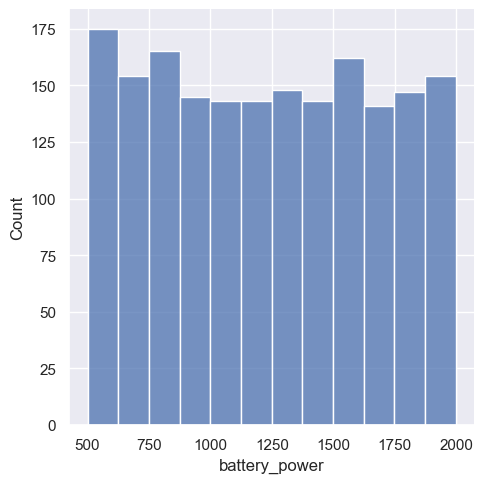

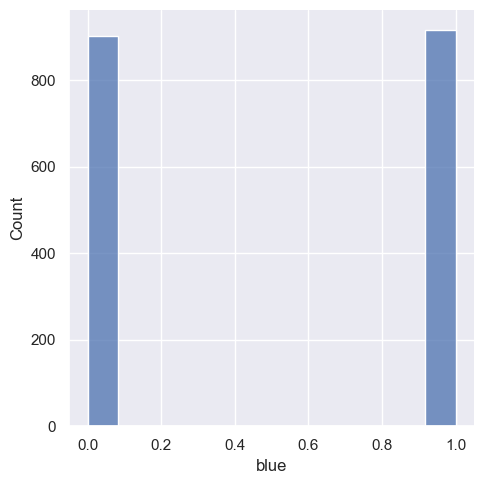

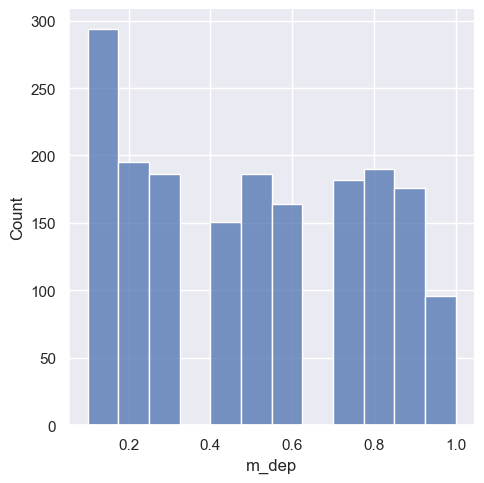

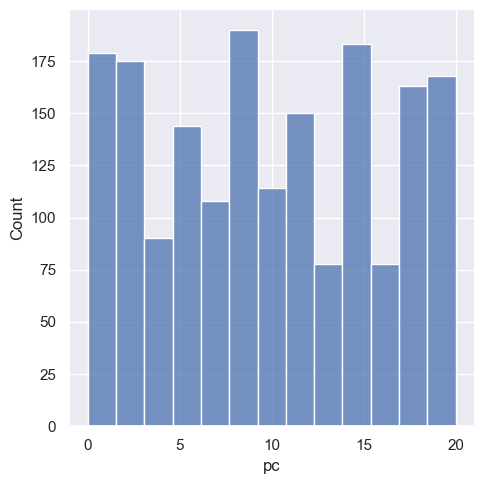

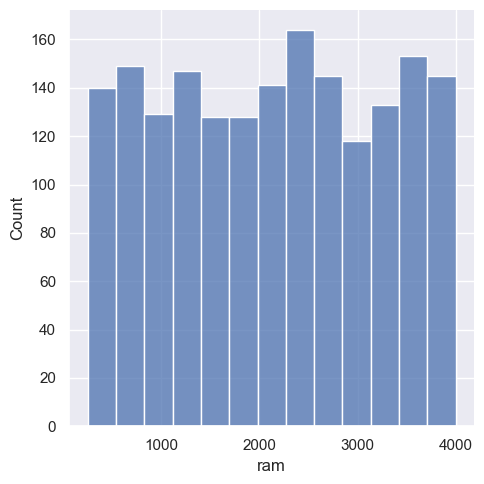

Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



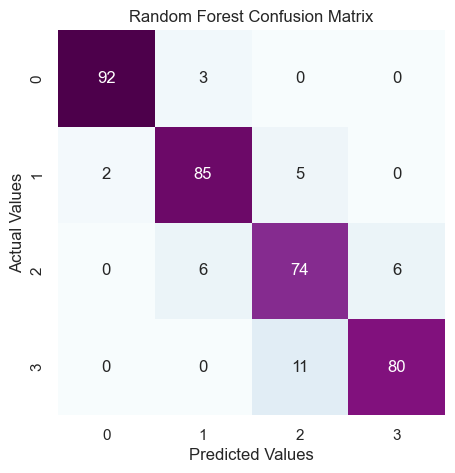

Gaussian NB Classifier Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



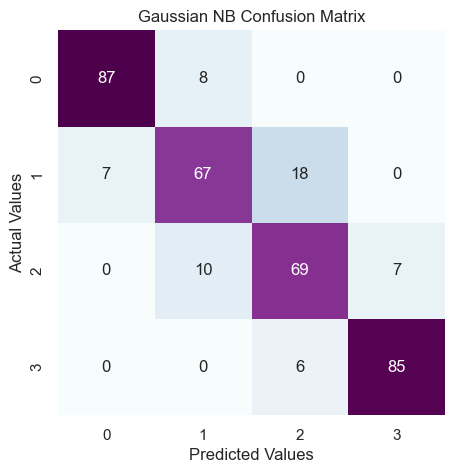

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



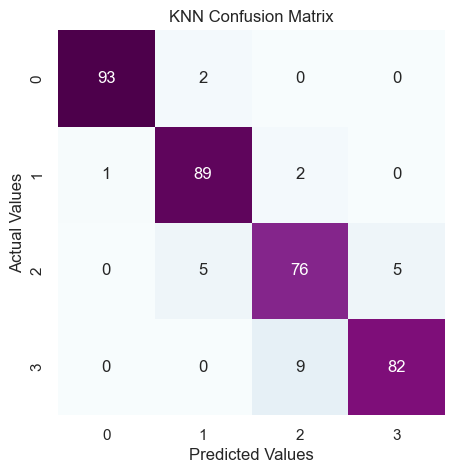

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



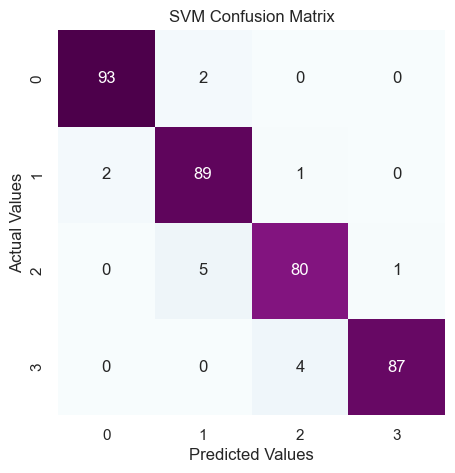

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
%matplotlib inline
train_data=pd.read_csv('train.csv')
train_data.head()
train_data.info()
train_data.describe()
train_data.corr()
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()
train_data_f.info()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["blue"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["pc"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["ram"])
plt.show()
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']
X.isna().any()
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

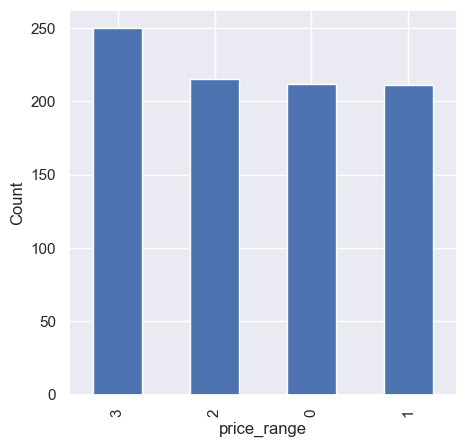

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  888 non-null    int64  
 1   blue           888 non-null    int64  
 2   clock_speed    888 non-null    float64
 3   dual_sim       888 non-null    int64  
 4   fc             888 non-null    int64  
 5   four_g         888 non-null    int64  
 6   int_memory     888 non-null    int64  
 7   m_dep          888 non-null    float64
 8   mobile_wt      888 non-null    int64  
 9   n_cores        888 non-null    int64  
 10  pc             888 non-null    int64  
 11  px_height      888 non-null    int64  
 12  px_width       888 non-null    int64  
 13  ram            888 non-null    int64  
 14  sc_h           888 non-null    int64  
 15  sc_w           888 non-null    int64  
 16  talk_time      888 non-null    int64  
 17  three_g        888 non-null    int64  
 18  touch_screen   

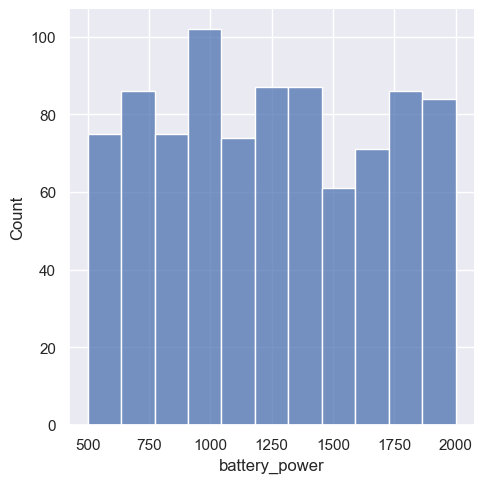

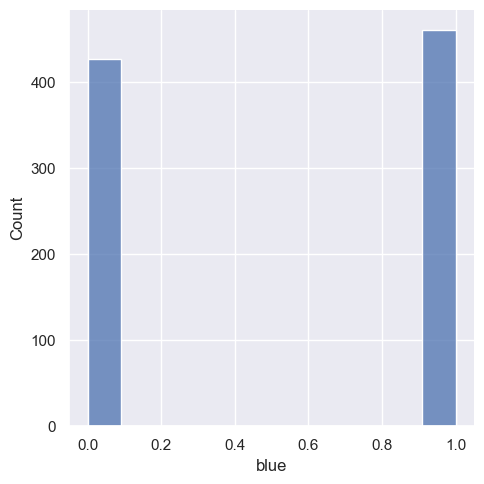

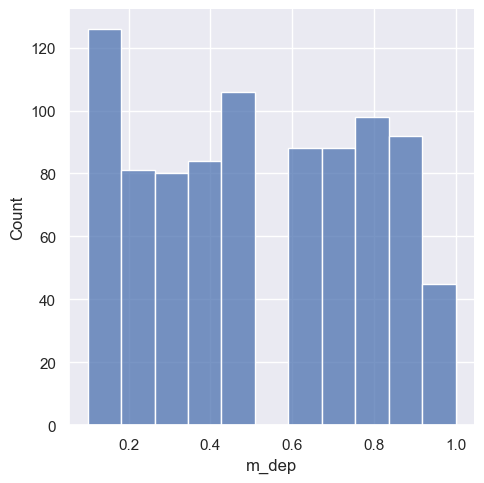

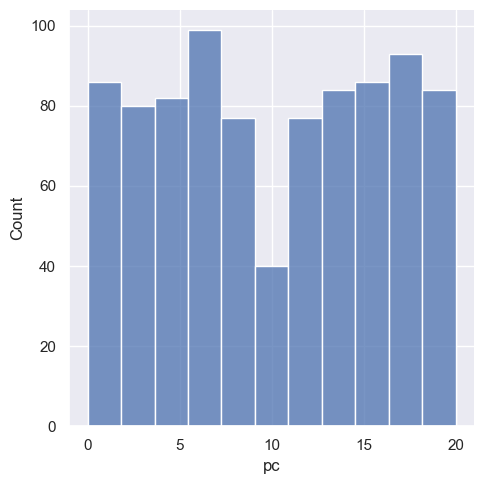

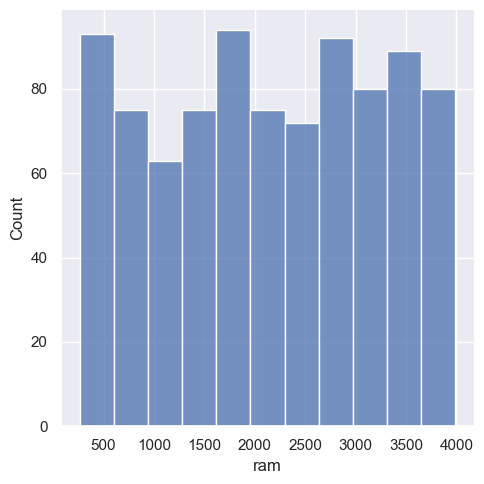

Random Forest Classifier Accuracy Score:  0.25842696629213485
              precision    recall  f1-score   support

           0       0.19      0.10      0.13        49
           1       0.37      0.17      0.23        42
           2       0.29      0.23      0.25        44
           3       0.25      0.56      0.34        43

    accuracy                           0.26       178
   macro avg       0.27      0.26      0.24       178
weighted avg       0.27      0.26      0.24       178



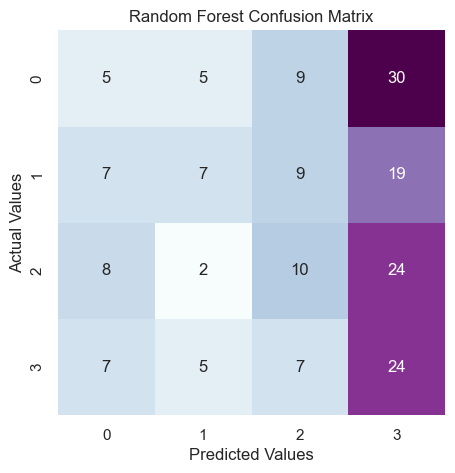

Gaussian NB Classifier Accuracy Score:  0.29213483146067415
              precision    recall  f1-score   support

           0       0.25      0.10      0.14        49
           1       0.32      0.40      0.36        42
           2       0.31      0.25      0.28        44
           3       0.28      0.44      0.34        43

    accuracy                           0.29       178
   macro avg       0.29      0.30      0.28       178
weighted avg       0.29      0.29      0.27       178



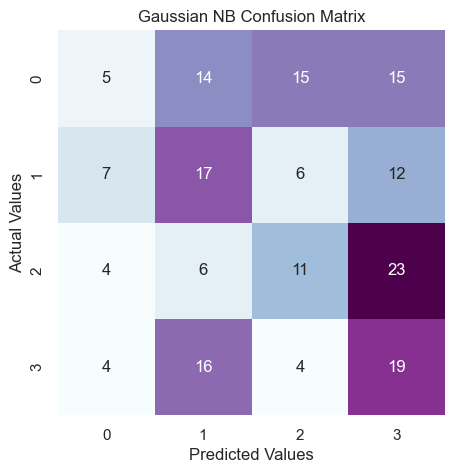

KNN Classifier Accuracy Score:  0.3089887640449438
              precision    recall  f1-score   support

           0       0.34      0.51      0.41        49
           1       0.25      0.29      0.27        42
           2       0.30      0.23      0.26        44
           3       0.35      0.19      0.24        43

    accuracy                           0.31       178
   macro avg       0.31      0.30      0.29       178
weighted avg       0.31      0.31      0.30       178



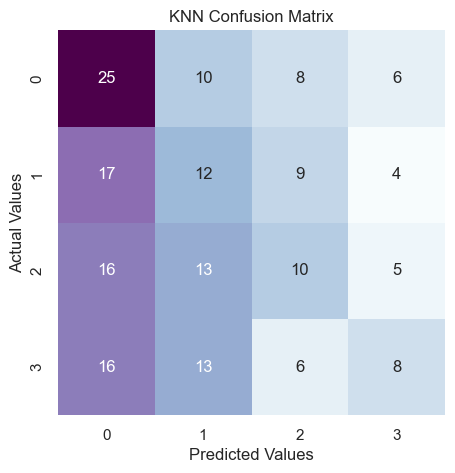

SVM Classifier Accuracy Score:  0.24157303370786518
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        44
           3       0.24      1.00      0.39        43

    accuracy                           0.24       178
   macro avg       0.06      0.25      0.10       178
weighted avg       0.06      0.24      0.09       178



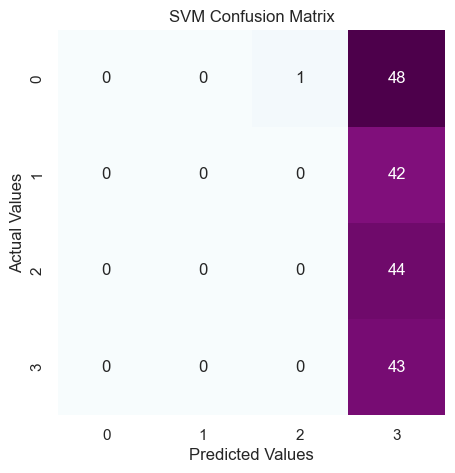

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
%matplotlib inline
train_data=pd.read_csv('testupt.csv')
train_data.head()
train_data.info()
train_data.describe()
train_data.corr()
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()
train_data_f.info()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["blue"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["pc"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["ram"])
plt.show()
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']
X.isna().any()
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
%matplotlib inline
train_data=pd.read_csv('test.csv')
train_data.head()
train_data.info()
train_data.describe()
train_data.corr()
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()
train_data_f.info()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["blue"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["pc"])
plt.show()
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["ram"])
plt.show()
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']
X.isna().any()
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

KeyError: 'price_range'